<a href="https://colab.research.google.com/github/Calaria/pytorch_models/blob/main/Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# Transform to convert images to PyTorch tensors and normalize them
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts a PIL Image or numpy.ndarray to a FloatTensor.
    transforms.Normalize((0.5,), (0.5,))  # Normalizes a tensor to have mean 0.5 and standard deviation 0.5
])

# Load the MNIST training data
train_dataset = datasets.MNIST(
    root='./data',  # directory where the data is or will be saved
    train=True,  # specifies training dataset
    download=True,  # downloads the data from the internet if it’s not available at root
    transform=transform  # applies the transformation to the data
)

# Load the MNIST test data
test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
BATCH_SIZE = 32
# DataLoader for the training data
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# DataLoader for the test data
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 86956645.29it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 115147997.93it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31093558.18it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20911667.14it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
print(f"DataloadersL {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader :{len(test_dataloader)} batches of {BATCH_SIZE}")

DataloadersL (<torch.utils.data.dataloader.DataLoader object at 0x7d9948a42e30>, <torch.utils.data.dataloader.DataLoader object at 0x7d9948a43400>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader :313 batches of 32


In [ ]:
torch.manual_seed(42)
class_names=train_dataset.classes
print(class_names)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [ ]:
class DigitMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.block_2=nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x:torch.Tensor):
      x=self.block_1(x)

      x=self.block_2(x)

      x=self.classifier(x)

      return x
torch.manual_seed(42)
model_0=DigitMNISTModelV0(input_shape=1,
                          hidden_units=10,
                          output_shape=len(class_names)).to(device)
model_0

DigitMNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# Testing model

In [ ]:
image, label=train_dataset[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)

In [ ]:
conv_layer = nn.Conv2d(in_channels=1,
                       out_channels=5,
                       kernel_size=3,
                       stride=1,
                       padding=0)
tmp=conv_layer(image)


In [ ]:
image.shape,tmp.shape

(torch.Size([1, 28, 28]), torch.Size([5, 26, 26]))

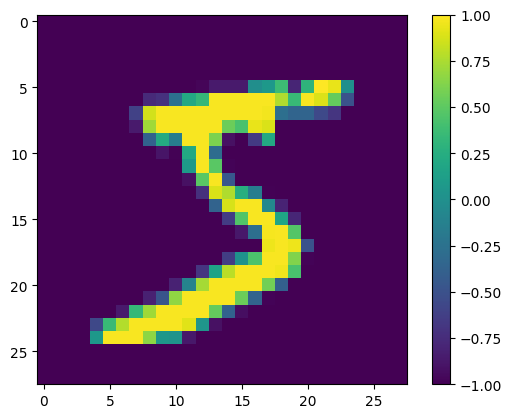

In [ ]:
import matplotlib.pyplot as plt
import torch
image = image.squeeze(0)
plt.imshow(image )
plt.colorbar()
plt.show()

In [ ]:
label

5

# Training the Model

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [ ]:
from tqdm import tqdm
from train_and_test_step import *

from print_time import *#type: ignore

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
from helper_functions import accuracy_fn#type: ignore

In [ ]:
#train
train_time_start_model_0 = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(data_loader=train_dataloader,
             model=model_0,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
             )
  test_step(data_loader=test_dataloader,
            model=model_0,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device
            )
  train_time_end_model_0 = timer()
  total_train_time_model_0 = print_train_time(start=train_time_start_model_0,
                                              end=train_time_end_model_0,
                                              device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.24747 | Train accuracy: 91.92%


 33%|███▎      | 1/3 [00:19<00:39, 19.72s/it]

Test loss: 0.06632 | Test accuracy: 97.92%

Train_time on cuda: 19.719 seconds
Epoch: 1
--------
Train loss: 0.06600 | Train accuracy: 97.97%


 67%|██████▋   | 2/3 [00:38<00:19, 19.16s/it]

Test loss: 0.04491 | Test accuracy: 98.41%

Train_time on cuda: 38.486 seconds
Epoch: 2
--------
Train loss: 0.05110 | Train accuracy: 98.43%


100%|██████████| 3/3 [00:57<00:00, 19.33s/it]

Test loss: 0.04643 | Test accuracy: 98.43%

Train_time on cuda: 57.988 seconds


In [ ]:
from train_and_test_step import eval_model

In [ ]:
model_0_results = eval_model(
    model=model_0,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'DigitMNISTModelV0',
 'model_loss': 2.3035457134246826,
 'model_acc': 10.303514376996805}

In [ ]:
#evaluate
def make_predictions(model: torch.nn.Module, data: list, device: torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare
      sample = torch.unsqueeze(sample, dim=0).to(device)

      #Forward pass

      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      #Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels  = []
for sample , label in random.sample(list(test_dataset),k=9):
  test_samples.append(sample)
  test_labels.append(label)
print(f"test sample image shape :{test_samples[0].shape}\n Test sample label:{test_labels[0]} ({class_names[test_labels[0]]})")

test sample image shape :torch.Size([1, 28, 28])
 Test sample label:2 (2 - two)


In [ ]:
#make predictions
pred_probs = make_predictions(model=model_0,
                              data=test_samples)
pred_probs

tensor([[1.2399e-08, 2.5763e-06, 9.9997e-01, 2.6821e-05, 5.5287e-12, 1.8146e-12,
         1.3885e-11, 3.3846e-07, 2.0989e-06, 1.4338e-09],
        [7.3932e-09, 9.9921e-01, 2.4224e-06, 2.3300e-06, 7.4886e-05, 8.6748e-05,
         6.3643e-06, 6.8984e-05, 5.3388e-04, 1.0758e-05],
        [4.8287e-03, 1.5371e-08, 9.4561e-01, 4.9522e-02, 1.6812e-09, 4.0782e-08,
         1.8498e-09, 1.0024e-05, 2.7360e-05, 9.2425e-07],
        [2.2425e-10, 2.2024e-07, 1.1067e-10, 1.7614e-06, 9.9992e-01, 1.4597e-05,
         6.1496e-11, 4.8249e-05, 3.8922e-08, 1.2741e-05],
        [8.0754e-08, 1.5697e-13, 1.4976e-11, 1.0038e-13, 8.5394e-09, 2.8779e-09,
         1.0000e+00, 8.7980e-11, 4.8165e-11, 2.0053e-12],
        [1.3946e-06, 7.5273e-10, 5.6413e-10, 2.7747e-10, 3.8534e-07, 2.7188e-08,
         1.0000e+00, 8.9719e-10, 1.6701e-08, 1.1367e-11],
        [1.6230e-12, 1.1052e-07, 1.7765e-10, 6.8047e-09, 1.0000e+00, 2.3355e-08,
         8.0436e-13, 1.7982e-06, 2.8679e-08, 6.6399e-07],
        [8.2913e-09, 3.4691

In [ ]:
pred_classes= pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

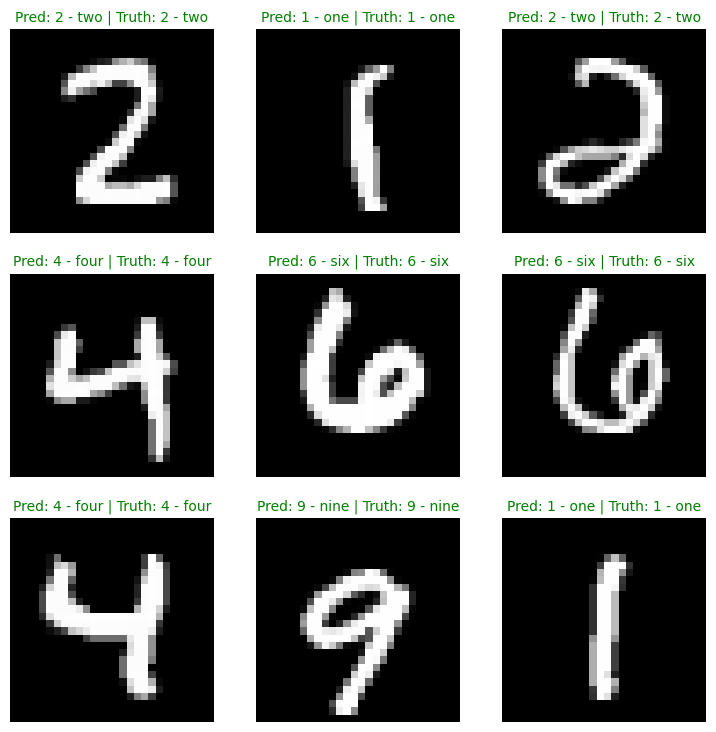

In [ ]:
#Visualize
plt.figure(figsize=(9,9))
nrows = 3
ncols=3
for i ,sample in enumerate(test_samples):
  #Create a subplot
  plt.subplot(nrows, ncols, i+1)
  #Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")
  #Find the prediction label
  pred_label = class_names[pred_classes[i]]
  #Get the truth label
  truth_label = class_names[test_labels[i]]
  #Create title
  title_text=f"Pred: {pred_label} | Truth: {truth_label}"
  #Check
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fonsize=10,c="r")
  plt.axis(False)



In [ ]:
#Make predictions
from tqdm.auto import tqdm#

#1. Make predictions
y_preds= []
model_0.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions"):
    X,y=X.to(device),y.to(device)
    #Do the froward  pass
    y_logit = model_0(X)
    #logits->prediction probabilities ->predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    #Put predictions for evaluation
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.7 MB/s eta 0:00:00
mlxtend version: 0.23.1


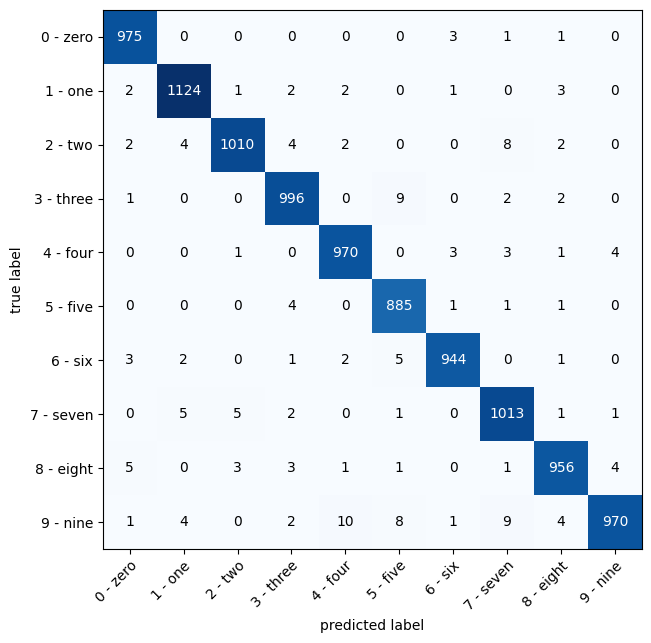

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup up confusion matrix
confmat = ConfusionMatrix(num_classes= len(class_names), task='multiclass')
confmat_tensor = confmat(preds= y_pred_tensor,
                         target= test_dataset.targets)

# plot the confusion matrix

fig,ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)